In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import glob
import pandas as pd

In [3]:
%cd demo_trips

/Users/johngill/Documents/DSE/jgilliii/DSE220/Homework/Final/demo_trips


In [4]:
!ls -l ads*

-rw-r--r--  1 johngill  staff  921481 May 28 19:52 ads demo 1.csv
-rw-r--r--  1 johngill  staff  400628 May 28 19:52 ads demo 10.csv
-rw-r--r--  1 johngill  staff  392681 May 28 19:52 ads demo 11.csv
-rw-r--r--  1 johngill  staff  915388 May 28 19:52 ads demo 2.csv
-rw-r--r--  1 johngill  staff  605693 May 28 19:52 ads demo 3.csv
-rw-r--r--  1 johngill  staff  545373 May 28 19:52 ads demo 4.csv
-rw-r--r--  1 johngill  staff  530027 May 28 19:52 ads demo 5.csv
-rw-r--r--  1 johngill  staff  513382 May 28 19:52 ads demo 6.csv
-rw-r--r--  1 johngill  staff  465052 May 28 19:52 ads demo 7.csv
-rw-r--r--  1 johngill  staff  457379 May 28 19:52 ads demo 8.csv
-rw-r--r--  1 johngill  staff  433258 May 28 19:52 ads demo 9.csv


In [5]:
panel_demo = pd.DataFrame()
for f in glob.glob('ads demo*.csv'):
    year = [int(s.rstrip('.csv')) for s in f.split() if s.rstrip('.csv').isdigit()][0] + 2000
    if year < 2008:
        tpd = pd.read_csv(f)
        tpd['year'] = year
        panel_demo = panel_demo.append(tpd, ignore_index=True)
panel_demo.describe()

,Panelist ID,Panelist Type,Combined Pre-Tax Income of HH,Family Size,Type of Residential Possession,HH_AGE,HH_EDU,HH_OCC,Age Group Applied to Male HH,Education Level Reached by Male HH,...,Children Group Code,Marital Status,Year,HH Head Race (RACE3),ZIPCODE,FIPSCODE,market based upon zipcode,IRI Geography Number,EXT_FACT,year
count,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,28822.000000,28822.000000,28822.000000,56692.000000,56692.000000,...,56692.000000,56692.000000,56692.000000,28822.000000,28822.000000,28822.000000,28822.000000,28822.000000,28822,56692.000000
mean,2362064.028928,2.657518,6.887515,2.420941,1.731338,4.452016,4.946187,6.097079,5.018627,6.093805,...,6.875838,2.201210,3.218761,1.048921,29041.294150,40622.744293,2.075047,2.040525,1,2003.218761
std,1037591.105435,2.928620,3.032128,1.276275,0.448057,1.430207,1.885957,4.569266,1.825444,2.562848,...,2.148682,0.903502,1.999872,0.498324,26728.278736,15000.433132,5.939375,0.999196,0,1.999872
min,1100016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1201.000000,12085.000000,1.000000,1.000000,1,2001.000000
25%,1199737.000000,0.000000,5.000000,2.000000,1.000000,4.000000,4.000000,1.000000,4.000000,4.000000,...,8.000000,2.000000,2.000000,1.000000,1201.000000,25003.000000,1.000000,1.000000,1,2002.000000
50%,3117642.500000,0.000000,7.000000,2.000000,2.000000,5.000000,5.000000,6.000000,5.000000,6.000000,...,8.000000,2.000000,3.000000,1.000000,54701.000000,55017.000000,3.000000,3.000000,1,2003.000000
75%,3181307.000000,6.000000,9.000000,3.000000,2.000000,6.000000,6.000000,10.000000,7.000000,9.000000,...,8.000000,2.000000,5.000000,1.000000,54703.000000,55033.000000,3.000000,3.000000,1,2005.000000
max,4266791.000000,9.000000,12.000000,6.000000,2.000000,6.000000,8.000000,13.000000,7.000000,9.000000,...,8.000000,5.000000,7.000000,7.000000,54772.000000,55035.000000,996.000000,3.000000,1,2007.000000


In [7]:
fe_pd = panel_demo.copy()
print fe_pd.shape

# Feature Engineering
fe_pd = fe_pd.drop(['Panelist ID', 'HISP_FLAG', 'HISP_CAT', 'HH Head Race (RACE2)',
                    'Microwave Owned by HH', 'market based upon zipcode','MALE_SMOKE',
                    'FEM_SMOKE','EXT_FACT','FIPSCODE','HH_RACE','Language', 'Year','year'], axis=1)
# Panelest Type:
    # 0 = Card Only
    # 5 = Card + key
    # 6 = Card switch from key
    # 7 = Key only
    # 8 = Canceled panelist (only found in a few year 1 and year 2 records; ignore panelist)
    # 9 = Key switch from card
fe_pd['PanelType_Card'] = (panel_demo['Panelist Type'] == 0).astype(int)
fe_pd['PanelType_CardKey'] = (panel_demo['Panelist Type'] == 5).astype(int)
fe_pd['PanelType_CardSwitchKey'] = (panel_demo['Panelist Type'] == 6).astype(int)
fe_pd['PanelType_Key'] = (panel_demo['Panelist Type'] == 7).astype(int)
fe_pd['PanelType_Canceled'] = (panel_demo['Panelist Type'] == 8).astype(int)
fe_pd['PanelType_KeySwitchCard'] = (panel_demo['Panelist Type'] == 9).astype(int)
fe_pd = fe_pd.drop('Panelist Type', axis=1)

# Combined Pre-Tax Income of HH
    # 0 = 'N/A'
    # 1 = '$00,000 to $ 9,999 per yr'
    # 2 = '$10,000 to $11,999 per yr'
    # 3 = '$12,000 to $14,999 per yr'
    # 4 = '$15,000 to $19,999 per yr'
    # 5 = '$20,000 to $24,999 per yr'
    # 6 = '$25,000 to $34,999 per yr'
    # 7 = '$35,000 to $44,999 per yr'
    # 8 = '$45,000 to $54,999 per yr'
    # 9 = '$55,000 to $64,999 per yr'
    # 10 = '$65,000 to $74,999 per yr'
    # 11 = '$75,000 to $99,999 per yr'
fe_pd['HH_Income_NA'] = (panel_demo['Combined Pre-Tax Income of HH'] == 0).astype(int)
fe_pd['HH_Income_0k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 1).astype(int)
fe_pd['HH_Income_10k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 2).astype(int)
fe_pd['HH_Income_12k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 3).astype(int)
fe_pd['HH_Income_15k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 4).astype(int)
fe_pd['HH_Income_20k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 5).astype(int)
fe_pd['HH_Income_25k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 6).astype(int)
fe_pd['HH_Income_35k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 7).astype(int)
fe_pd['HH_Income_45k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 8).astype(int)
fe_pd['HH_Income_55k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 9).astype(int)
fe_pd['HH_Income_65k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 10).astype(int)
fe_pd['HH_Income_75k'] = (panel_demo['Combined Pre-Tax Income of HH'] == 11).astype(int)
fe_pd = fe_pd.drop('Combined Pre-Tax Income of HH', axis=1)

# Family Size:
    # 0 = 'N/A'
    # 1 = 'One person'
    # 2 = 'Two people'
    # 3 = 'Three people'
    # 4 = 'Four people'
    # 5 = 'Five people'
    # 6 = 'Six or more people'
fe_pd['FamSize_NA'] = (panel_demo['Family Size'] == 0).astype(int)
fe_pd['FamSize_One'] = (panel_demo['Family Size'] == 1).astype(int)
fe_pd['FamSize_Two'] = (panel_demo['Family Size'] == 2).astype(int)
fe_pd['FamSize_Three'] = (panel_demo['Family Size'] == 3).astype(int)
fe_pd['FamSize_Foud'] = (panel_demo['Family Size'] == 4).astype(int)
fe_pd['FamSize_Five'] = (panel_demo['Family Size'] == 5).astype(int)
fe_pd['FamSize_Six'] = (panel_demo['Family Size'] == 6).astype(int)
fe_pd = fe_pd.drop('Family Size', axis=1)

# Type of Residential Possession
    # 0 = 'N/A'
    # 1 = 'Renter'
    # 2 = 'Owner'
fe_pd['Residential_NA'] = (panel_demo['Type of Residential Possession'] == 0).astype(int)
fe_pd['Residential_Renter'] = (panel_demo['Type of Residential Possession'] == 1).astype(int)
fe_pd['Residential_Owner'] = (panel_demo['Type of Residential Possession'] == 1).astype(int)
fe_pd = fe_pd.drop('Type of Residential Possession', axis=1)

# ￼HH_AGE
    # 0 = ‘N/A’
    # 1 = '18 - 24'
    # 2 = '25 - 34'
    # 3 = '35 - 44'
    # 4 = '45 - 54'
    # 5 = '55 - 64'
    # 6 = '65 + '
    # 7 = 'No such person'
fe_pd['HH_Age_NA'] = ((panel_demo['HH_AGE'] == 0) & (panel_demo['HH_AGE'] == 7)).astype(int)
fe_pd['HH_Age_18_24'] = (panel_demo['HH_AGE'] == 1).astype(int)
fe_pd['HH_Age_25_34'] = (panel_demo['HH_AGE'] == 2).astype(int)
fe_pd['HH_Age_35_44'] = (panel_demo['HH_AGE'] == 3).astype(int)
fe_pd['HH_Age_45_54'] = (panel_demo['HH_AGE'] == 4).astype(int)
fe_pd['HH_Age_55_64'] = (panel_demo['HH_AGE'] == 5).astype(int)
fe_pd['HH_Age_65'] = (panel_demo['HH_AGE'] == 6).astype(int)
fe_pd = fe_pd.drop('HH_AGE', axis=1)

# HH_EDU
    # 0 = ‘N/A’
    # 1 = 'Some grade school or less' 
    # 2 = 'Completed grade school'
    # 3 = 'Some high school'
    # 4 = 'Graduated high school'
    # 5 = 'Technical school'
    # 6 = 'Some college'
    # 7 = 'Graduated from college'
    # 8 = 'Post graduate work'
    # 9 = 'No such head of household'
fe_pd['HH_Age_NA'] = ((panel_demo['HH_EDU'] == 0) & (panel_demo['HH_EDU'] == 9)).astype(int)
fe_pd['HH_EDU_GS'] = (panel_demo['HH_EDU'] == 1).astype(int)
fe_pd['HH_EDU_FGS'] = (panel_demo['HH_EDU'] == 2).astype(int)
fe_pd['HH_EDU_HS'] = (panel_demo['HH_EDU'] == 3).astype(int)
fe_pd['HH_EDU_FHS'] = (panel_demo['HH_EDU'] == 4).astype(int)
fe_pd['HH_EDU_TS'] = (panel_demo['HH_EDU'] == 5).astype(int)
fe_pd['HH_EDU_G'] = (panel_demo['HH_EDU'] == 6).astype(int)
fe_pd['HH_EDU_FG'] = (panel_demo['HH_EDU'] == 7).astype(int)
fe_pd['HH_EDU_PG'] = (panel_demo['HH_EDU'] == 8).astype(int)
fe_pd = fe_pd.drop('HH_EDU', axis=1)

# HH_OCC
    # 0 = 'Other'
    # 1 = 'Professional or technical'
    # 2 = 'Manager or administrator'
    # 3 = 'Sales'
    # 4 = 'Clerical'
    # 5 = 'Craftsman'
    # 6 = 'Operative (machine operator)' 
    # 7 = 'Laborer'
    # 8 = 'Cleaning, food, health service worker'
    # 9 = 'Private household worker'
    # 10 = 'Retired'
    # 11 = 'No such head of household' 
    # 13 = 'Not employed'
fe_pd['HH_OCC_NA'] = ((panel_demo['HH_OCC'] == 0) & (panel_demo['HH_OCC'] == 11)).astype(int)
fe_pd['HH_OCC_Prof'] = (panel_demo['HH_OCC'] == 1).astype(int)
fe_pd['HH_OCC_Manage'] = (panel_demo['HH_OCC'] == 2).astype(int)
fe_pd['HH_OCC_Sales'] = (panel_demo['HH_OCC'] == 3).astype(int)
fe_pd['HH_OCC_Cleric'] = (panel_demo['HH_OCC'] == 4).astype(int)
fe_pd['HH_OCC_Craft'] = (panel_demo['HH_OCC'] == 5).astype(int)
fe_pd['HH_OCC_Machine'] = (panel_demo['HH_OCC'] == 6).astype(int)
fe_pd['HH_OCC_Labor'] = (panel_demo['HH_OCC'] == 7).astype(int)
fe_pd['HH_OCC_Cleaning'] = (panel_demo['HH_OCC'] == 8).astype(int)
fe_pd['HH_OCC_Private'] = (panel_demo['HH_OCC'] == 9).astype(int)
fe_pd['HH_OCC_Retired'] = (panel_demo['HH_OCC'] == 10).astype(int)
fe_pd['HH_OCC_NoEmployed'] = (panel_demo['HH_OCC'] == 13).astype(int)
fe_pd = fe_pd.drop('HH_OCC', axis=1)

# Age Group Applied to Male HH
fe_pd['Male_HH_Age_NA'] = ((panel_demo['Age Group Applied to Male HH'] == 0) & \
(panel_demo['Age Group Applied to Male HH'] == 7)).astype(int)
fe_pd['Male_HH_Age_18_24'] = (panel_demo['Age Group Applied to Male HH'] == 1).astype(int)
fe_pd['Male_HH_Age_25_34'] = (panel_demo['Age Group Applied to Male HH'] == 2).astype(int)
fe_pd['Male_HH_Age_35_44'] = (panel_demo['Age Group Applied to Male HH'] == 3).astype(int)
fe_pd['Male_HH_Age_45_54'] = (panel_demo['Age Group Applied to Male HH'] == 4).astype(int)
fe_pd['Male_HH_Age_55_64'] = (panel_demo['Age Group Applied to Male HH'] == 5).astype(int)
fe_pd['Male_HH_Age_65'] = (panel_demo['Age Group Applied to Male HH'] == 6).astype(int)
fe_pd = fe_pd.drop('Age Group Applied to Male HH', axis=1)

# Age Group Applied to Female HH
fe_pd['Female_HH_Age_NA'] = ((panel_demo['Age Group Applied to Female HH'] == 0) & \
(panel_demo['Age Group Applied to Female HH'] == 7)).astype(int)
fe_pd['Female_HH_Age_18_24'] = (panel_demo['Age Group Applied to Female HH'] == 1).astype(int)
fe_pd['Female_HH_Age_25_34'] = (panel_demo['Age Group Applied to Female HH'] == 2).astype(int)
fe_pd['Female_HH_Age_35_44'] = (panel_demo['Age Group Applied to Female HH'] == 3).astype(int)
fe_pd['Female_HH_Age_45_54'] = (panel_demo['Age Group Applied to Female HH'] == 4).astype(int)
fe_pd['Female_HH_Age_55_64'] = (panel_demo['Age Group Applied to Female HH'] == 5).astype(int)
fe_pd['Female_HH_Age_65'] = (panel_demo['Age Group Applied to Female HH'] == 6).astype(int)
fe_pd = fe_pd.drop('Age Group Applied to Female HH', axis=1)

# Education Level Reached by Male HH
fe_pd['Male_HH_Age_NA'] = ((panel_demo['Education Level Reached by Male HH'] == 0) & \
(panel_demo['Education Level Reached by Male HH'] == 9)).astype(int)
fe_pd['Male_HH_EDU_GS'] = (panel_demo['Education Level Reached by Male HH'] == 1).astype(int)
fe_pd['Male_HH_EDU_FGS'] = (panel_demo['Education Level Reached by Male HH'] == 2).astype(int)
fe_pd['Male_HH_EDU_HS'] = (panel_demo['Education Level Reached by Male HH'] == 3).astype(int)
fe_pd['Male_HH_EDU_FHS'] = (panel_demo['Education Level Reached by Male HH'] == 4).astype(int)
fe_pd['Male_HH_EDU_TS'] = (panel_demo['Education Level Reached by Male HH'] == 5).astype(int)
fe_pd['Male_HH_EDU_G'] = (panel_demo['Education Level Reached by Male HH'] == 6).astype(int)
fe_pd['Male_HH_EDU_FG'] = (panel_demo['Education Level Reached by Male HH'] == 7).astype(int)
fe_pd['Male_HH_EDU_PG'] = (panel_demo['Education Level Reached by Male HH'] == 8).astype(int)
fe_pd = fe_pd.drop('Education Level Reached by Male HH', axis=1)

# Education Level Reached by Female HH
fe_pd['Female_HH_Age_NA'] = ((panel_demo['Education Level Reached by Female HH'] == 0) & \
(panel_demo['Education Level Reached by Female HH'] == 9)).astype(int)
fe_pd['Female_HH_EDU_GS'] = (panel_demo['Education Level Reached by Female HH'] == 1).astype(int)
fe_pd['Female_HH_EDU_FGS'] = (panel_demo['Education Level Reached by Female HH'] == 2).astype(int)
fe_pd['Female_HH_EDU_HS'] = (panel_demo['Education Level Reached by Female HH'] == 3).astype(int)
fe_pd['Female_HH_EDU_FHS'] = (panel_demo['Education Level Reached by Female HH'] == 4).astype(int)
fe_pd['Female_HH_EDU_TS'] = (panel_demo['Education Level Reached by Female HH'] == 5).astype(int)
fe_pd['Female_HH_EDU_G'] = (panel_demo['Education Level Reached by Female HH'] == 6).astype(int)
fe_pd['Female_HH_EDU_FG'] = (panel_demo['Education Level Reached by Female HH'] == 7).astype(int)
fe_pd['Female_HH_EDU_PG'] = (panel_demo['Education Level Reached by Female HH'] == 8).astype(int)
fe_pd = fe_pd.drop('Education Level Reached by Female HH', axis=1)

# Occupation Code of Male HH
fe_pd['Male_HH_OCC_NA'] = ((panel_demo['Occupation Code of Male HH'] == 0) & \
(panel_demo['Occupation Code of Male HH'] == 11)).astype(int)
fe_pd['Male_HH_OCC_Prof'] = (panel_demo['Occupation Code of Male HH'] == 1).astype(int)
fe_pd['Male_HH_OCC_Manage'] = (panel_demo['Occupation Code of Male HH'] == 2).astype(int)
fe_pd['Male_HH_OCC_Sales'] = (panel_demo['Occupation Code of Male HH'] == 3).astype(int)
fe_pd['Male_HH_OCC_Cleric'] = (panel_demo['Occupation Code of Male HH'] == 4).astype(int)
fe_pd['Male_HH_OCC_Craft'] = (panel_demo['Occupation Code of Male HH'] == 5).astype(int)
fe_pd['Male_HH_OCC_Machine'] = (panel_demo['Occupation Code of Male HH'] == 6).astype(int)
fe_pd['Male_HH_OCC_Labor'] = (panel_demo['Occupation Code of Male HH'] == 7).astype(int)
fe_pd['Male_HH_OCC_Cleaning'] = (panel_demo['Occupation Code of Male HH'] == 8).astype(int)
fe_pd['Male_HH_OCC_Private'] = (panel_demo['Occupation Code of Male HH'] == 9).astype(int)
fe_pd['Male_HH_OCC_Retired'] = (panel_demo['Occupation Code of Male HH'] == 10).astype(int)
fe_pd['Male_HH_OCC_NoEmployed'] = (panel_demo['Occupation Code of Male HH'] == 13).astype(int)
fe_pd = fe_pd.drop('Occupation Code of Male HH', axis=1)

# Occupation Code of Female HH
fe_pd['Female_HH_OCC_NA'] = ((panel_demo['Occupation Code of Female HH'] == 0) & \
(panel_demo['Occupation Code of Female HH'] == 11)).astype(int)
fe_pd['Female_HH_OCC_Prof'] = (panel_demo['Occupation Code of Female HH'] == 1).astype(int)
fe_pd['Female_HH_OCC_Manage'] = (panel_demo['Occupation Code of Female HH'] == 2).astype(int)
fe_pd['Female_HH_OCC_Sales'] = (panel_demo['Occupation Code of Female HH'] == 3).astype(int)
fe_pd['Female_HH_OCC_Cleric'] = (panel_demo['Occupation Code of Female HH'] == 4).astype(int)
fe_pd['Female_HH_OCC_Craft'] = (panel_demo['Occupation Code of Female HH'] == 5).astype(int)
fe_pd['Female_HH_OCC_Machine'] = (panel_demo['Occupation Code of Female HH'] == 6).astype(int)
fe_pd['Female_HH_OCC_Labor'] = (panel_demo['Occupation Code of Female HH'] == 7).astype(int)
fe_pd['Female_HH_OCC_Cleaning'] = (panel_demo['Occupation Code of Female HH'] == 8).astype(int)
fe_pd['Female_HH_OCC_Private'] = (panel_demo['Occupation Code of Female HH'] == 9).astype(int)
fe_pd['Female_HH_OCC_Retired'] = (panel_demo['Occupation Code of Female HH'] == 10).astype(int)
fe_pd['Female_HH_OCC_NoEmployed'] = (panel_demo['Occupation Code of Female HH'] == 13).astype(int)
fe_pd = fe_pd.drop('Occupation Code of Female HH', axis=1)

# Male Working Hour Code
    # 1 = 'Not employed'
    # 2 = 'Part time, < 35 hrs./wk.' 
    # 3 = 'Full time, > 35 hrs./wk.'
    # 4 = 'Retired'
    # 5 = 'Homemaker'
    # 6 = 'Student'
    # 7 = 'N/A'
fe_pd['Male_WorkHour_NA'] = ((panel_demo['Male Working Hour Code'] == 1) & \
(panel_demo['Male Working Hour Code'] == 7)).astype(int)
fe_pd['Male_WorkHour_PartTime'] = (panel_demo['Male Working Hour Code'] == 2).astype(int)
fe_pd['Male_WorkHour_FullTime'] = (panel_demo['Male Working Hour Code'] == 3).astype(int)
fe_pd['Male_WorkHour_Retired'] = (panel_demo['Male Working Hour Code'] == 4).astype(int)
fe_pd['Male_WorkHour_Homemaker'] = (panel_demo['Male Working Hour Code'] == 5).astype(int)
fe_pd['Male_WorkHour_Student'] = (panel_demo['Male Working Hour Code'] == 6).astype(int)
fe_pd = fe_pd.drop('Male Working Hour Code', axis=1)

# Female Working Hour Code
fe_pd['Female_WorkHour_NA'] = ((panel_demo['Female Working Hour Code'] == 1) & \
(panel_demo['Female Working Hour Code'] == 7)).astype(int)
fe_pd['Female_WorkHour_PartTime'] = (panel_demo['Female Working Hour Code'] == 2).astype(int)
fe_pd['Female_WorkHour_FullTime'] = (panel_demo['Female Working Hour Code'] == 3).astype(int)
fe_pd['Female_WorkHour_Retired'] = (panel_demo['Female Working Hour Code'] == 4).astype(int)
fe_pd['Female_WorkHour_Homemaker'] = (panel_demo['Female Working Hour Code'] == 5).astype(int)
fe_pd['Female_WorkHour_Student'] = (panel_demo['Female Working Hour Code'] == 6).astype(int)
fe_pd = fe_pd.drop('Female Working Hour Code', axis=1)

# Number of Dogs
    # 0 = 'None'
    # 1 = 'One'
    # 2 = 'Two'
    # 3 = 'Three'
    # 4 = 'Four'
    # 5 = 'Five +'
fe_pd['Num_Dogs_Zero'] = (panel_demo['Number of Dogs'] == 0).astype(int)
fe_pd['Num_Dogs_One'] = (panel_demo['Number of Dogs'] == 1).astype(int)
fe_pd['Num_Dogs_Two'] = (panel_demo['Number of Dogs'] == 2).astype(int)
fe_pd['Num_Dogs_Three'] = (panel_demo['Number of Dogs'] == 3).astype(int)
fe_pd['Num_Dogs_Four'] = (panel_demo['Number of Dogs'] == 4).astype(int)
fe_pd['Num_Dogs_Five'] = (panel_demo['Number of Dogs'] == 5).astype(int)
fe_pd = fe_pd.drop('Number of Dogs', axis=1)

# Number of Cats
fe_pd['Num_Cats_Zero'] = (panel_demo['Number of Cats'] == 0).astype(int)
fe_pd['Num_Cats_One'] = (panel_demo['Number of Cats'] == 1).astype(int)
fe_pd['Num_Cats_Two'] = (panel_demo['Number of Cats'] == 2).astype(int)
fe_pd['Num_Cats_Three'] = (panel_demo['Number of Cats'] == 3).astype(int)
fe_pd['Num_Cats_Four'] = (panel_demo['Number of Cats'] == 4).astype(int)
fe_pd['Num_Cats_Five'] = (panel_demo['Number of Cats'] == 5).astype(int)
fe_pd = fe_pd.drop('Number of Cats', axis=1)

# Marital Status
    # 0 = 'N/A'
    # 1 = 'Single'
    # 2 = 'Married'
    # 3 = 'Divorced'
    # 4 = 'Widowed'
    # 5 = 'Separated'
fe_pd['Marital_NA'] = (panel_demo['Marital Status'] == 0).astype(int)
fe_pd['Marital_Single'] = (panel_demo['Marital Status'] == 1).astype(int)
fe_pd['Marital_Married'] = (panel_demo['Marital Status'] == 2).astype(int)
fe_pd['Marital_Divorced'] = (panel_demo['Marital Status'] == 3).astype(int)
fe_pd['Marital_Widowed'] = (panel_demo['Marital Status'] == 4).astype(int)
fe_pd['Marital_Separated'] = (panel_demo['Marital Status'] == 5).astype(int)
fe_pd = fe_pd.drop('Marital Status', axis=1)

# Children Group Code
    # 0 = 'N/A'
    # 1 = 'Child in [0-5)'
    # 2 = 'Child in [6-11)'
    # 3 = 'Child in [12-17)'
    # 4 = 'Children in [0-5) & [6-11)'
    # 5 = 'Children in [0-5) & [12-17)'
    # 6 = 'Children in [6-11) & [1217)'
    # 7 = 'Children in [0-5),[6-11) & [12-17)'
    # 8 = 'Family size>0 yet no children'
fe_pd['Children_NA'] = (panel_demo['Children Group Code'] == 0).astype(int)
fe_pd['Children_0_5'] = (panel_demo['Children Group Code'] == 1).astype(int)
fe_pd['Children_6_11'] = (panel_demo['Children Group Code'] == 2).astype(int)
fe_pd['Children_12_17'] = (panel_demo['Children Group Code'] == 3).astype(int)
fe_pd['Children_0_5_6_11'] = (panel_demo['Children Group Code'] == 4).astype(int)
fe_pd['Children_0_5_12_17'] = (panel_demo['Children Group Code'] == 5).astype(int)
fe_pd['Children_6_11_12_17'] = (panel_demo['Children Group Code'] == 6).astype(int)
fe_pd['Children_0_5_6_11_12_17'] = (panel_demo['Children Group Code'] == 7).astype(int)
fe_pd['Children_0'] = (panel_demo['Children Group Code'] == 8).astype(int)
fe_pd = fe_pd.drop('Children Group Code', axis=1)

# HH Head Race (RACE3)
    # 0 = 'N/A'
    # 1 = 'White'
    # 2 = 'Black-African American' 
    # 3 = 'Hispanic'
    # 4 = 'Asian'
    # 5 = 'Other'
    # 6 = 'American Indian-Alaska Native'
    # 7 = 'Native Hawaiian-Pacific Islands'
fe_pd['HH_RACE_NA'] = (panel_demo['HH Head Race (RACE3)'] == 0).astype(int)
fe_pd['HH_RACE_White'] = (panel_demo['HH Head Race (RACE3)'] == 1).astype(int)
fe_pd['HH_RACE_Black'] = (panel_demo['HH Head Race (RACE3)'] == 2).astype(int)
fe_pd['HH_RACE_Hispanic'] = (panel_demo['HH Head Race (RACE3)'] == 3).astype(int)
fe_pd['HH_RACE_Asian'] = (panel_demo['HH Head Race (RACE3)'] == 4).astype(int)
fe_pd['HH_RACE_Other'] = (panel_demo['HH Head Race (RACE3)'] == 5).astype(int)
fe_pd['HH_RACE_Indian'] = (panel_demo['HH Head Race (RACE3)'] == 6).astype(int)
fe_pd['HH_RACE_Hawaiian'] = (panel_demo['HH Head Race (RACE3)'] == 7).astype(int)
fe_pd = fe_pd.drop('HH Head Race (RACE3)', axis=1)

# IRI Geography Number
    # 1 = Pittsfield
    # 3 = eau Claire
    # 7 = grand junction
    # 10 = cedar rapids-Iowa
fe_pd['IRI_GEO_Pitt'] = (panel_demo['IRI Geography Number'] == 1).astype(int)
fe_pd['IRI_GEO_Claire'] = (panel_demo['IRI Geography Number'] == 3).astype(int)
fe_pd['IRI_GEO_Grand'] = (panel_demo['IRI Geography Number'] == 7).astype(int)
fe_pd['IRI_GEO_Ceader'] = (panel_demo['IRI Geography Number'] == 10).astype(int)
fe_pd = fe_pd.drop('IRI Geography Number', axis=1)

def zipcode_risk(pd_f, f):
    gr = pd_f.groupby(f)
    num = float(len(pd_f[f]))
    for k in gr.groups.keys():
        k_perc = len(gr.groups[k]) / num
        pd_f[f].replace(k, k_perc, inplace=True)
    return pd_f

fe_pd = zipcode_risk(fe_pd, 'ZIPCODE')

def FloatOrZero(v):
    try:
        return float(v)
    except:
        return 0.0

# Clear out NaN values for remainging numeric columns
fe_pd['Number of TVs Hooked to Cable'] = fe_pd['Number of TVs Hooked to Cable'].apply(FloatOrZero)
fe_pd['Number of TVs Hooked to Cable'] = fe_pd['Number of TVs Hooked to Cable'].fillna(0)

fe_pd['Number of TVs Used by HH'] = fe_pd['Number of TVs Used by HH'].apply(FloatOrZero)
fe_pd['Number of TVs Used by HH'] = fe_pd['Number of TVs Used by HH'].fillna(0)
fe_pd['COUNTY'] = fe_pd['COUNTY'].apply(FloatOrZero)
fe_pd['COUNTY'] = fe_pd['COUNTY'].fillna(0)

fe_pd['ZIPCODE'] = fe_pd['ZIPCODE'].fillna(0)

print fe_pd.shape
print fe_pd.columns
fe_pd.describe()

(56692, 39)
(56692, 164)
Index([u'COUNTY', u'Number of TVs Used by HH', u'Number of TVs Hooked to Cable', u'ZIPCODE', u'PanelType_Card', u'PanelType_CardKey', u'PanelType_CardSwitchKey', u'PanelType_Key', u'PanelType_Canceled', u'PanelType_KeySwitchCard', u'HH_Income_NA', u'HH_Income_0k', u'HH_Income_10k', u'HH_Income_12k', u'HH_Income_15k', u'HH_Income_20k', u'HH_Income_25k', u'HH_Income_35k', u'HH_Income_45k', u'HH_Income_55k', u'HH_Income_65k', u'HH_Income_75k', u'FamSize_NA', u'FamSize_One', u'FamSize_Two', u'FamSize_Three', u'FamSize_Foud', u'FamSize_Five', u'FamSize_Six', u'Residential_NA', u'Residential_Renter', u'Residential_Owner', u'HH_Age_NA', u'HH_Age_18_24', u'HH_Age_25_34', u'HH_Age_35_44', u'HH_Age_45_54', u'HH_Age_55_64', u'HH_Age_65', u'HH_EDU_GS', u'HH_EDU_FGS', u'HH_EDU_HS', u'HH_EDU_FHS', u'HH_EDU_TS', u'HH_EDU_G', u'HH_EDU_FG', u'HH_EDU_PG', u'HH_OCC_NA', u'HH_OCC_Prof', u'HH_OCC_Manage', u'HH_OCC_Sales', u'HH_OCC_Cleric', u'HH_OCC_Craft', u'HH_OCC_Machine', u'HH_O

,COUNTY,Number of TVs Used by HH,Number of TVs Hooked to Cable,ZIPCODE,PanelType_Card,PanelType_CardKey,PanelType_CardSwitchKey,PanelType_Key,PanelType_Canceled,PanelType_KeySwitchCard,...,HH_RACE_Black,HH_RACE_Hispanic,HH_RACE_Asian,HH_RACE_Other,HH_RACE_Indian,HH_RACE_Hawaiian,IRI_GEO_Pitt,IRI_GEO_Claire,IRI_GEO_Grand,IRI_GEO_Ceader
count,56692,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.00000,56692.000000,...,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692.000000,56692,56692
mean,0,1.963893,1.686005,0.065954,0.544662,0.091671,0.357528,0.000176,0.00090,0.005062,...,0.004921,0.000758,0.001746,0.002664,0.001852,0.000194,0.243897,0.264499,0,0
std,0,1.722964,1.617067,0.080157,0.498006,0.288563,0.479276,0.013280,0.02998,0.070971,...,0.069980,0.027530,0.041752,0.051541,0.042997,0.013928,0.429435,0.441070,0,0
min,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
25%,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
50%,0,2.000000,1.000000,0.001094,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
75%,0,3.000000,3.000000,0.121234,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0,0
max,0,14.000000,11.000000,0.200064,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0


In [8]:
fe_pd.to_csv('fe_demos.csv', index=False)

In [109]:
from sklearn.decomposition import PCA
p_mdl = PCA(whiten=True)
p_mdl.fit(fe_pd)

PCA(copy=True, n_components=None, whiten=True)

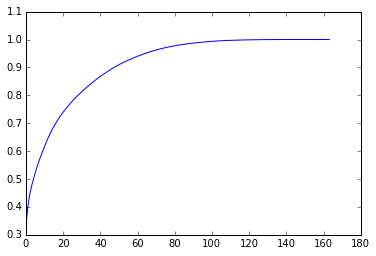

In [110]:
plt.plot(np.cumsum(p_mdl.explained_variance_ratio_))

In [111]:
var_explained = np.cumsum(p_mdl.explained_variance_ratio_)
num_comp = sum(var_explained < 0.95)
print num_comp
var_explained[:num_comp]

65


array([ 0.33053004,  0.39964525,  0.44371794,  0.4735652 ,  0.49884838,
        0.52238786,  0.54405071,  0.56404451,  0.58253076,  0.60030834,
        0.61684768,  0.63280809,  0.64847852,  0.66276974,  0.67618295,
        0.68819498,  0.69963233,  0.71076161,  0.72105927,  0.73064084,
        0.73959626,  0.74813129,  0.75631069,  0.76435931,  0.77197769,
        0.77947121,  0.7865923 ,  0.7936771 ,  0.80020635,  0.80661321,
        0.81289452,  0.81907917,  0.82499027,  0.83075486,  0.83638554,
        0.8419765 ,  0.84744943,  0.85274825,  0.8579434 ,  0.86297789,
        0.86788457,  0.87250629,  0.87703549,  0.8815081 ,  0.88594231,
        0.89024825,  0.89441618,  0.89849252,  0.90239747,  0.90605675,
        0.90963173,  0.9131386 ,  0.91654463,  0.91977727,  0.92293159,
        0.92598604,  0.92900048,  0.93183678,  0.93464074,  0.93735946,
        0.94005089,  0.94261901,  0.94514385,  0.94757864,  0.94991005])

In [112]:
p_mdl.components_.shape

(164, 164)

In [113]:
# Compute the norms of each feature in the new space
n = fe_pd.shape[1]
norms = np.zeros(n)
for i in xrange(n):
    norms[i] = np.linalg.norm(p_mdl.components_[:num_comp,i])**2
norms

array([  1.03920744e-32,   1.73123760e+00,   1.75423515e+00,
         5.00503464e-02,   4.08558213e+00,   5.82803220e+00,
         3.09154353e+00,   8.07733568e-05,   3.54791423e-04,
         5.16236754e-03,   1.28201927e-02,   1.46902771e+01,
         1.13292130e+01,   1.71972351e+01,   1.44620867e+01,
         1.08827093e+01,   6.98556667e+00,   7.38815339e+00,
         8.03436014e+00,   1.00328734e+01,   1.06030333e+01,
         9.76228807e+00,   3.62618356e-03,   4.61367051e+00,
         3.94402012e+00,   6.17991194e+00,   7.20421261e+00,
         6.30946282e+00,   5.05965394e-01,   1.27165290e-02,
         1.87256279e+00,   1.87256279e+00,   8.67741082e-30,
         1.80756216e-02,   1.73509319e+00,   3.45730133e+00,
         3.07125029e+00,   2.47605267e+00,   4.91811994e+00,
         1.32628374e-03,   1.39654361e-02,   3.66277972e+00,
         8.91113980e+00,   1.97814117e+00,   6.74383677e+00,
         2.13640686e+00,   3.30223965e+00,   4.52330094e-30,
         6.05306621e+00,

In [114]:
# Get the most important features
norm_list = list(norms)
pca_feature_list = set()
for idx in sorted(norms,reverse=True)[:num_comp]:
    print fe_pd.columns[norm_list.index(idx)],'-',idx
    pca_feature_list.add(fe_pd.columns[norm_list.index(idx)])

HH_Income_12k - 17.1972351131
Male_HH_OCC_Sales - 16.3339703468
HH_Income_0k - 14.6902770887
HH_Income_15k - 14.4620866671
Children_6_11 - 14.3698842448
Male_HH_OCC_Manage - 13.9837717706
Male_HH_OCC_Machine - 13.8072516089
Male_WorkHour_PartTime - 12.3947713295
Female_WorkHour_Homemaker - 12.1833628372
Male_WorkHour_Homemaker - 11.8423689122
HH_Income_10k - 11.3292130192
Female_HH_OCC_Cleaning - 11.188950079
Male_HH_OCC_Labor - 11.1654475777
HH_Income_20k - 10.8827092852
Male_HH_OCC_NoEmployed - 10.8218825612
HH_Income_65k - 10.6030332607
HH_Income_55k - 10.032873351
Female_HH_Age_18_24 - 10.007136886
HH_Income_75k - 9.76228807353
Children_12_17 - 9.70625876389
Male_HH_EDU_PG - 9.59945167653
Male_HH_Age_35_44 - 9.49009252073
Female_HH_OCC_Sales - 9.20056955993
Male_HH_Age_65 - 9.14252851824
Children_6_11_12_17 - 9.00031001855
HH_EDU_FHS - 8.91113979887
Male_HH_EDU_G - 8.78755382879
Male_HH_EDU_TS - 8.5962348289
Female_HH_OCC_Manage - 8.50582368376
Female_HH_EDU_HS - 8.44685622467
Mari

In [115]:
pca_top_fe_pd = fe_pd[list(pca_feature_list)]
pca_top_fe_pd.to_csv('pca_top_fe_demos.csv', index=False)

In [177]:
plt_pcl = PCA(n_components=3)
fe_pd_2d = plt_pcl.fit_transform(pca_top_fe_pd)
fe_pd_2d_df = pd.DataFrame(fe_pd_2d, columns=['x','y','z'])

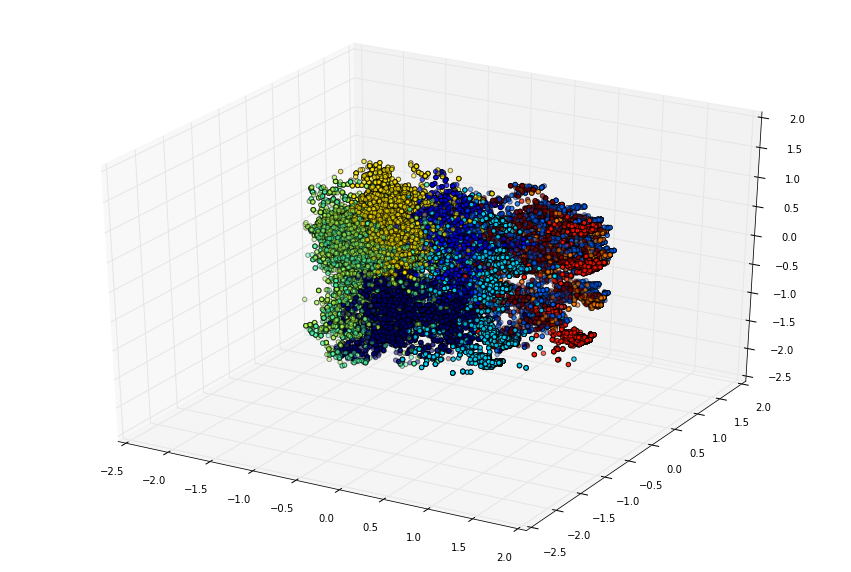

In [185]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10)).gca(projection='3d')

km_mdl = KMeans(n_clusters=10)
clust = km_mdl.fit_predict(pca_top_fe_pd)

fe_pd_2d_df['clust'] = clust

fig.scatter(fe_pd_2d_df['x'], fe_pd_2d_df['y'], fe_pd_2d_df['z'], c=fe_pd_2d_df['clust'])